In [1]:
from ESN import simple_ESN as sesn
import ESN
import ESNteachers as teach
import numpy as np
import aux
import matplotlib.pyplot as plt

[0.06957735515490532, 1.5375939415617152]

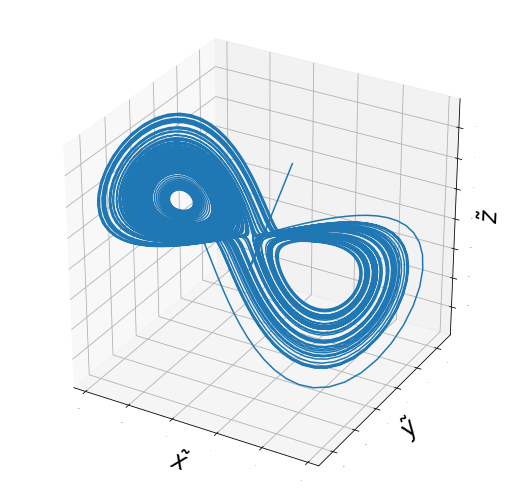

In [5]:
x, y, z = teach.Lorenz(400, 0.01)
xrun, yrun, zrun = teach.Lorenz(10000, 0.01)
yz = np.concatenate((y,z), axis=1)
xz = np.concatenate((x,z), axis=1)
xy = np.concatenate((x,y), axis=1)
linearcoef=[0.76159, 0.41997]

lor = sesn(N=400, K=1, L=2, binary_node=0,a=1.0)
W = lor.generate_W(rho=1.0, dens=0.25, cont=0)
Win=lor.generate_Win(dens=0.8)

trainx = lor.train_ESN(input_dat=x, teacher=yz, around=1, order=1, washout=100, mp=False, B=10**-2)

testrunx = lor.run_ESN(input_dat=xrun,around=1, order=1,time=10000)

lorattractorx=lor.plot_attractor(name='testLorenzx')

xout = lor.outputs

xrun1, xrun2=np.hsplit(xout, 2)
xrms=[aux.RMS(xrun1, yrun), aux.RMS(xrun2, zrun)]
xrmse1=aux.RMS_over_t(xrun1, yrun)
xrmse2=aux.RMS_over_t(xrun2, zrun)
xrmse = [xrms, xrmse1, xrmse2]

xrms

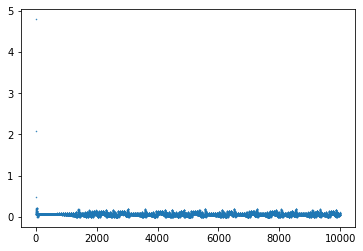

In [3]:
plt.plot(xrmse1, '.', markersize=1)
plt.show()

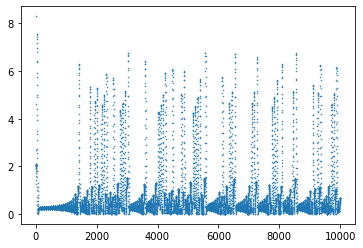

In [4]:
plt.plot(xrmse2, '.', markersize=1)
plt.show()